In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

Carga de datasets

In [2]:
coursera_courses = pd.read_csv("Coursera_courses.csv")

In [3]:
coursera_reviews = pd.read_csv("Coursera_reviews.csv")

In [4]:
edx_courses = pd.read_csv("edx_courses.csv")

In [5]:
udemy_courses = pd.read_csv("udemy_courses.csv")

Visualizacion de datos

Cursos de coursera

In [6]:
coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [7]:
coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


Reviews coursera

In [8]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [9]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


Cursos de edx

In [10]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [11]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Cursos de udemy

In [12]:
udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [13]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Vamos a cambiar el tipo de la columna course_id a tipo object ya que no es necesario que sea tipo int.

In [14]:
udemy_courses['course_id'] = udemy_courses['course_id'].astype('object')

Otra data

In [15]:
coursera_courses_2 = pd.read_csv("coursea_data.csv")

In [16]:
coursera_courses_2.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [17]:
coursera_courses_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [18]:
udemy_reviews = pd.read_csv("Comments.csv")

In [19]:
udemy_reviews.head()

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...


Vamos a crear un dataset de los cursos de udemy donde vamos a crear una nueva columna con el promedio redondeado del rating de cada curso con la informacion del dataset "udemy_reviews".

In [20]:
# Calcular el promedio redondeado del rate y contar la cantidad de comentarios por curso en udemy_reviews
promedio_rate = udemy_reviews.groupby('course_id')['rate'].mean().round().reset_index()
cantidad_comentarios = udemy_reviews.groupby('course_id').size().reset_index(name='cantidad_comentarios')

# Unir el DataFrame udemy_courses con el promedio_rate y cantidad_comentarios utilizando la columna 'course_id'
udemy_courses_rate = pd.merge(udemy_courses, promedio_rate, on='course_id', how='left')
udemy_courses_rate = pd.merge(udemy_courses_rate, cantidad_comentarios, on='course_id', how='left')


In [21]:
udemy_courses_rate.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,rate,cantidad_comentarios
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,4.0,30.0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,4.0,402.0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,4.0,149.0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,4.0,92.0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,5.0,20.0


Cambiamos los tipos de las nuevas variables

In [22]:
udemy_courses_rate['rate'] = udemy_courses_rate['rate'].astype('Int64')

In [23]:
udemy_courses_rate['cantidad_comentarios'] = udemy_courses_rate['cantidad_comentarios'].astype('Int64')

In [24]:
udemy_courses_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course_id             3678 non-null   object 
 1   course_title          3678 non-null   object 
 2   url                   3678 non-null   object 
 3   is_paid               3678 non-null   bool   
 4   price                 3678 non-null   int64  
 5   num_subscribers       3678 non-null   int64  
 6   num_reviews           3678 non-null   int64  
 7   num_lectures          3678 non-null   int64  
 8   level                 3678 non-null   object 
 9   content_duration      3678 non-null   float64
 10  published_timestamp   3678 non-null   object 
 11  subject               3678 non-null   object 
 12  rate                  2328 non-null   Int64  
 13  cantidad_comentarios  2328 non-null   Int64  
dtypes: Int64(2), bool(1), float64(1), int64(4), object(6)
memory usage: 384.

# Analisis exploratorio de los datos

Primero vamos a hacer un analisis univariable para analizar cada variable de cada dataset y luego vamos a realizar un analisis multivariable para visualizar patrones de variables en conjunto.

# Analisis Univariable

## Cursos de Coursera

Vamos a crear un dataset de los cursos de coursera donde vamos a crear una nueva columna con el promedio redondeado del rating de cada curso con la informacion del dataset "coursera_reviews".

In [30]:
# Calcular el promedio redondeado del rate y contar la cantidad de comentarios por curso en udemy_reviews
promedio_rate = coursera_reviews.groupby('course_id')['rating'].mean().round().reset_index()
cantidad_comentarios = coursera_reviews.groupby('course_id').size().reset_index(name='cantidad_comentarios')

# Unir el DataFrame coursera_courses con el promedio_rate y cantidad_comentarios utilizando la columna 'course_id'
coursera_courses_rate = pd.merge(coursera_courses, promedio_rate, on='course_id', how='left')
coursera_courses_rate = pd.merge(coursera_courses_rate, cantidad_comentarios, on='course_id', how='left')


In [31]:
coursera_courses_rate.head()

,name,institution,course_url,course_id,rating,cantidad_comentarios
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,5.0,35895.0
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,5.0,3702.0
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,5.0,20085.0
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,5.0,35319.0
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,5.0,87.0


El dataset "coursera_courses_rate" es una union de dos dataset de los cursos de coursera proporcionados por Henry. Por mi cuenta encontre un dataset de los cursos de coursera que lo llame "coursera_courses_2".
Vamos a comparar el dataset "coursera_courses_rate" con el dataset "coursera_courses_2".

In [32]:
coursera_courses_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  623 non-null    object 
 1   institution           623 non-null    object 
 2   course_url            623 non-null    object 
 3   course_id             623 non-null    object 
 4   rating                604 non-null    float64
 5   cantidad_comentarios  604 non-null    float64
dtypes: float64(2), object(4)
memory usage: 29.3+ KB


Dataset descargado de Kaggle:

In [33]:
coursera_courses_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


Podemos ver que el dataset "coursera_courses_2" contiene mas informacion sobre los cursos, asi que voy a trabajar con este dataset en cuenta de los proporcionados por Henry sobre los cursos de Coursera.

## Analisis de Cursos de Coursera

In [34]:
coursera_courses_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [35]:
coursera_courses_2.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [36]:
# Vamos a borrar la columna "Unnamed: 0" ya que no nos aporta informacion.
del coursera_courses_2["Unnamed: 0"]

Vamos a ver cuantos cursos tiene cada institucion.

In [37]:
# Ver cuantos cursos tiene cada institucion
conteo_categorias = coursera_courses_2['course_organization'].value_counts()
conteo_categorias

course_organization
University of Pennsylvania                     59
University of Michigan                         41
Google Cloud                                   34
Johns Hopkins University                       28
Duke University                                28
                                               ..
Nanyang Technological University, Singapore     1
ScrumTrek                                       1
JetBrains                                       1
Tsinghua University                             1
Mail.Ru Group                                   1
Name: count, Length: 154, dtype: int64

Podemos ver que "University of Pennsylvania" es la institucion que mas cursos posee en Coursera.

Vamos a visualizar las palabras que mas aparecen en los titulos con una nube de palabras.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Outlet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


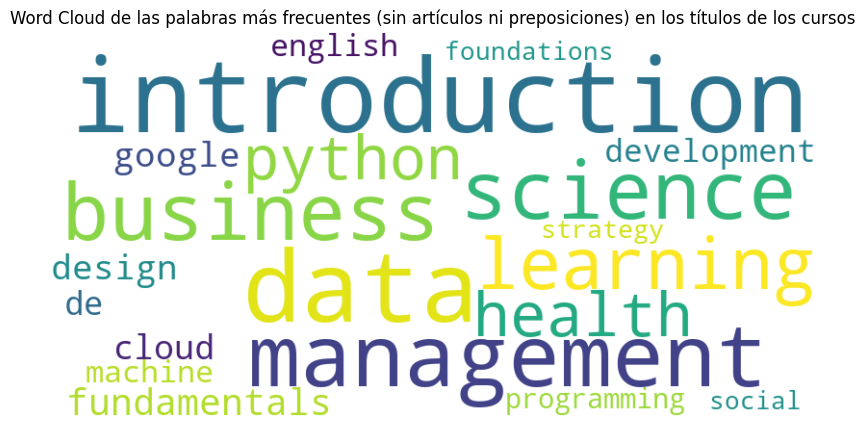

In [38]:
# Obtener la columna 'name' como una lista
course_names = coursera_courses_2['course_title'].tolist()

# Unir los nombres de los cursos en un solo texto
text = ' '.join(course_names)

# Tokenización y eliminación de palabras comunes (stop words)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Puedes cambiar 'english' por el idioma correspondiente
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Contar la frecuencia de las palabras
word_counts = Counter(words)

# Obtener las palabras más frecuentes
top_words = word_counts.most_common(20)  # Cambia el número 20 según la cantidad de palabras más frecuentes que desees incluir

# Crear el objeto WordCloud con las palabras más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de las palabras más frecuentes (sin artículos ni preposiciones) en los títulos de los cursos')
plt.show()

Podemos ver que las palabras mas frecuentes son "introduction" y "data" en los titulos de los cursos de Coursera.

Vamos a ver en un grafico countplot la cantidad de valores de la categoria "course_Certificate_type"

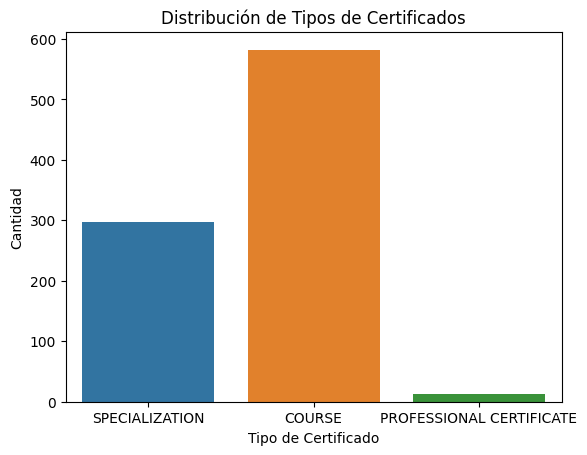

In [39]:
# Graficar el Countplot
sns.countplot(data=coursera_courses_2, x='course_Certificate_type')

# Añadir etiquetas y título
plt.xlabel('Tipo de Certificado')
plt.ylabel('Cantidad')
plt.title('Distribución de Tipos de Certificados')

# Mostrar el gráfico
plt.show()

Podemos visualizar que en la columna "course_Certificate_type" hay mas valores "course".

Vamos a hacer un analisis descriptivo de la columna "course_rating".

In [40]:
coursera_courses_2["course_rating"].describe()

count    891.000000
mean       4.677329
std        0.162225
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: course_rating, dtype: float64

Podemos ver que la mayoria son valores altos de puntuacion de los cursos.

Vamos a realizar un histograma de los valores de la columna "course_rating".

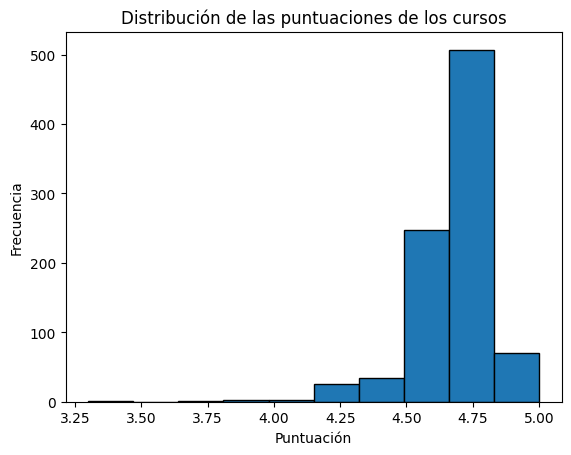

In [41]:
# Histograma
plt.hist(coursera_courses_2['course_rating'], bins=10, edgecolor='black')
plt.title('Distribución de las puntuaciones de los cursos')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()

Vamos a visualizar cuantos cursos hay en cada categoria de "course_difficulty".

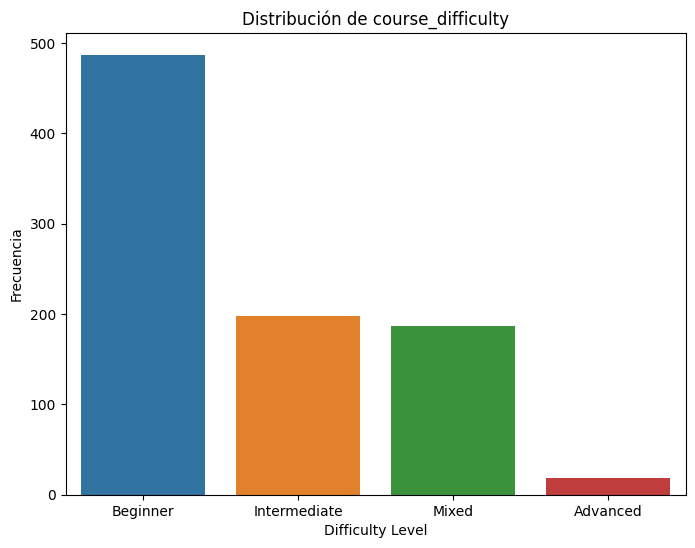

In [42]:
# Grafico de barras de la categoria "course_difficulty"
plt.figure(figsize=(8, 6))
sns.countplot(data=coursera_courses_2, x='course_difficulty')
plt.title('Distribución de course_difficulty')
plt.xlabel('Difficulty Level')
plt.ylabel('Frecuencia')
plt.show()

Podemos visualizar que la mayoria de los cursos de Coursera son para principiantes.

Vamos a hacer un analisis descriptivo de la columna "course_students_enrolled". Primero vamos a convertir los valores para que puedan ser valores de tipo int.

La función verifica si hay un carácter como "k" o "m" y realiza la conversión apropiada.

In [43]:
def convert_to_numeric(value):
    if 'k' in value:
        return int(float(value[:-1]) * 1000)
    elif 'm' in value:
        return int(float(value[:-1]) * 1000000)
    else:
        return int(value)

# Aplicar la función a la columna "course_students_enrolled"
coursera_courses_2['course_students_enrolled'] = coursera_courses_2['course_students_enrolled'].apply(convert_to_numeric)

In [44]:
coursera_courses_2['course_students_enrolled'] = coursera_courses_2['course_students_enrolled'].astype("Int64")

In [45]:
coursera_courses_2["course_students_enrolled"].describe()

count            891.0
mean      90552.076319
std      181936.453852
min             1500.0
25%            17500.0
50%            42000.0
75%            99500.0
max          3200000.0
Name: course_students_enrolled, dtype: Float64

Vamos a visualizar los 10 cursos que mas matriculados tienen.

In [46]:
largest_enrollments = coursera_courses_2.nlargest(10, 'course_students_enrolled')
print(largest_enrollments[["course_title", "course_students_enrolled"]])

                                          course_title  \
564                                   Machine Learning   
815                          The Science of Well-Being   
688                               Python for Everybody   
674  Programming for Everybody (Getting Started wit...   
196                                       Data Science   
129                                     Career Success   
261                     English for Career Development   
765  Successful Negotiation: Essential Strategies a...   
199                  Data Science: Foundations using R   
211                                      Deep Learning   

     course_students_enrolled  
564                   3200000  
815                   2500000  
688                   1500000  
674                   1300000  
196                    830000  
129                    790000  
261                    760000  
765                    750000  
199                    740000  
211                    690000  


Vamos a visualizar los 10 cursos que menos matriculados tienen.

In [47]:
# Ordenar el dataframe por la columna 'n_enrolled' en orden ascendente
coursera_courses_2 = coursera_courses_2.sort_values('course_students_enrolled')

# Obtener los 10 cursos con menos matriculados
least_enrolled_courses = coursera_courses_2.head(10)

# Imprimir la lista de cursos
print(least_enrolled_courses[['course_title', 'course_students_enrolled']])

                                          course_title  \
251  El Abogado del Futuro: Legaltech y la Transfor...   
432                       Infectious Disease Modelling   
96         Blockchain Revolution in Financial Services   
406                                     Healthcare Law   
423  Identifying, Monitoring, and Analyzing Risk an...   
810              The Pronunciation of American English   
280                                            Esports   
93   Blended Language Learning: Design and Practice...   
459                  International Security Management   
425  Implementing RPA with Cognitive Automation and...   

     course_students_enrolled  
251                      1500  
432                      1600  
96                       1600  
406                      1700  
423                      1700  
810                      1700  
280                      1800  
93                       1900  
459                      2200  
425                      2200  


## Analisis de Cursos de Edx

In [48]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [49]:
edx_courses.head(1)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online


Vamos a visualizar las palabras que mas aparecen en los titulos con una nube de palabras.

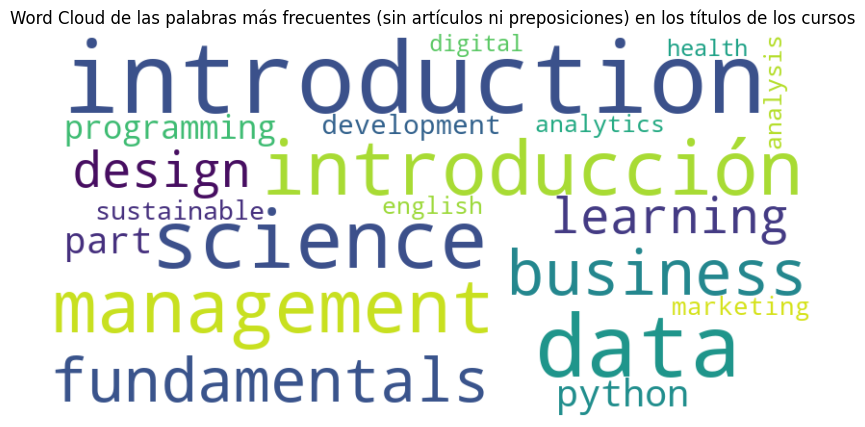

In [50]:
# Descargar las stop words en inglés y en español
stop_words_english = set(stopwords.words('english'))
stop_words_spanish = set(stopwords.words('spanish'))

# Obtener la columna 'title' como una lista
course_names = edx_courses['title'].tolist()

# Unir los nombres de los cursos en un solo texto
text = ' '.join(course_names)

# Tokenización y eliminación de palabras comunes (stop words)
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalpha()
         and word.lower() not in stop_words_english
         and word.lower() not in stop_words_spanish]

# Contar la frecuencia de las palabras
word_counts = Counter(words)

# Obtener las palabras más frecuentes
top_words = word_counts.most_common(20)  # Cambia el número 20 según la cantidad de palabras más frecuentes que desees incluir

# Crear el objeto WordCloud con las palabras más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de las palabras más frecuentes (sin artículos ni preposiciones) en los títulos de los cursos')
plt.show()

Podemos visualizar que el tema mas utilizado en los titulos es la introduccion y data.

Vamos a visualizar las palabras que mas aparecen en la columna "summary" con una nube de palabras.

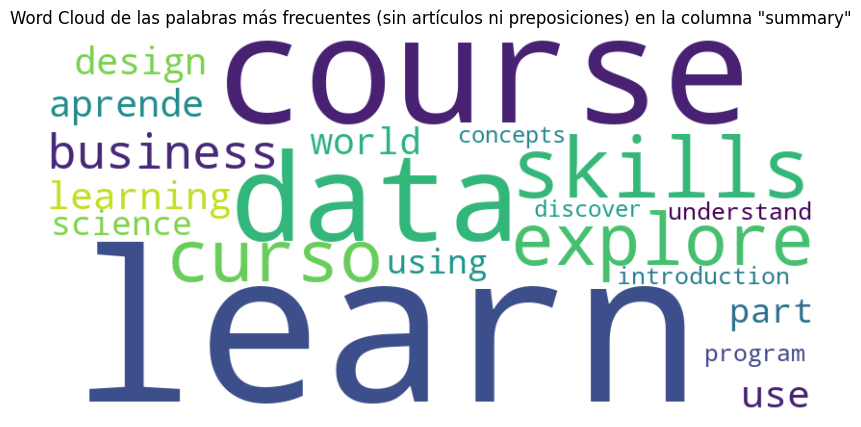

In [51]:
# Obtener la columna 'summary' como una lista
course_names = edx_courses['summary'].tolist()

# Filtrar los valores nulos o faltantes en la lista
course_names = [str(course) for course in course_names if not pd.isnull(course)]

# Unir los nombres de los cursos en un solo texto
text = ' '.join(course_names)

# Descargar las stop words en inglés y en español
stop_words_english = set(stopwords.words('english'))
stop_words_spanish = set(stopwords.words('spanish'))

# Tokenización y eliminación de palabras comunes (stop words)
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalpha()
         and word.lower() not in stop_words_english
         and word.lower() not in stop_words_spanish]

# Contar la frecuencia de las palabras
word_counts = Counter(words)

# Obtener las palabras más frecuentes
top_words = word_counts.most_common(20)  # Cambia el número 20 según la cantidad de palabras más frecuentes que desees incluir

# Crear el objeto WordCloud con las palabras más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de las palabras más frecuentes (sin artículos ni preposiciones) en la columna "summary"')
plt.show()

Podemos visualizar que la palabra mas frecuente es "learn" en la columna "summary" que contiene el resumen de lo que se trata de cada curso en Edx.

La columna "n_enrolled" representa el número de estudiantes inscritos en cada curso. Vamos a cambiar el tipo de esta columna a tipo int para poder hacer un analisis descriptivo.

In [52]:
# Vamos a sacar la "," de los numeros para poder pasarlos a tipo int.
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].str.replace(',', '')

In [53]:
# Convertimos la columna "n_enrolled" a tipo int
edx_courses['n_enrolled'] = pd.to_numeric(edx_courses['n_enrolled'], errors='coerce').astype('Int64')

In [54]:
# Calculamos las estadísticas descriptivas
edx_courses['n_enrolled'].describe()

count            855.0
mean      53260.350877
std      119030.857555
min             5001.0
25%            11764.5
50%            24130.0
75%            54796.0
max          2442271.0
Name: n_enrolled, dtype: Float64

Se puede observar que hay mucha desviacion estandar.

Vamos a visualizar los 10 cursos que mas matriculados tienen.

In [55]:
# Obtener los 10 cursos con mayor cantidad de estudiantes matriculados
top_courses = edx_courses.nlargest(10, 'n_enrolled')

# Mostrar la lista de cursos con mayor cantidad de estudiantes matriculados
print(top_courses[['title', 'n_enrolled']])

                                                title  n_enrolled
2             CS50's Introduction to Computer Science     2442271
29                    IELTS Academic Test Preparation     1103777
31       TOEFL® Test Preparation: The Insider’s Guide     1022489
23  CS50's Web Programming with Python and JavaScript      698950
64                              Introduction to Linux      642088
16                             Data Science: R Basics      528782
48                           The Science of Happiness      475614
24    Contract Law: From Trust to Promise to Contract      414181
30                      The Architectural Imagination      406181
35                   Basic Spanish 1: Getting Started      400169


CS50's es un curso de informática introductorio ofrecido por la Universidad de Harvard.

Vamos a visualizar los 10 cursos que menos matriculados tienen.

In [56]:
# Ordenar el dataframe por la columna 'n_enrolled' en orden ascendente
edx_courses_sorted = edx_courses.sort_values('n_enrolled')

# Obtener los 10 cursos con menos matriculados
least_enrolled_courses = edx_courses_sorted.head(10)

# Imprimir la lista de cursos
print(least_enrolled_courses[['title', 'n_enrolled']])

                                                 title  n_enrolled
456  Inteligencia artificial: Chatbots sin programa...        5001
722                           Deep Learning Essentials        5018
676                                 Enterprise Selling        5020
787     Tools for Academic Engagement in Public Policy        5035
794  General Overview of Cannabis and the Industry’...        5048
739           Modelos predictivos con Machine Learning        5102
894  Seeking Women’s Rights: Colonial Period to the...        5157
648                             Reservoir Geomechanics        5280
570  Pivoting to Online Teaching: Research and Prac...        5289
444    Cybersecurity for Critical Urban Infrastructure        5306


Vamos a hacer un countplot para hacer un analisis de la columna "course_type".

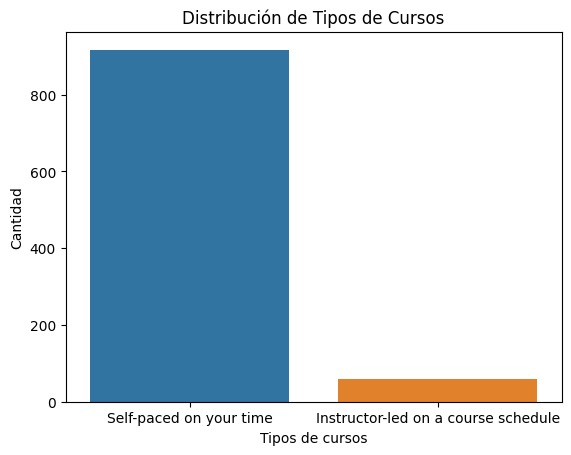

In [57]:
# Graficar el Countplot
sns.countplot(data=edx_courses, x='course_type')

# Añadir etiquetas y título
plt.xlabel('Tipos de cursos')
plt.ylabel('Cantidad')
plt.title('Distribución de Tipos de Cursos')

# Mostrar el gráfico
plt.show()

Podemos ver que la mayoria de los cursos son "a su propio ritmo en su tiempo".

Vamos a ver cuantos cursos tiene cada institucion.

In [58]:
# Ver cuantos cursos tiene cada institucion
conteo_categorias = edx_courses['institution'].value_counts()
conteo_categorias

institution
Harvard University                                                    104
Universitat Politècnica de Valencia                                    47
Massachusetts Institute of Technology                                  41
Delft University of Technology                                         30
IBM                                                                    30
                                                                     ... 
The University of Tokyo                                                 1
Educational Testing Service                                             1
The National University of Singapore                                    1
University of Oxford                                                    1
University of Maryland Global Campus-University System of Maryland      1
Name: count, Length: 111, dtype: int64

Podemos ver que "Harvard University" es la institucion que mas cursos posee en Edx. 

Vamos a crear una nueva columna "instructors_count" donde se va a indicar la cantidad de instructores por curso.

In [59]:
# Crear la nueva columna 'instructors_count' con la cantidad de instructores por curso
edx_courses['instructors_count'] = edx_courses['instructors'].str.count('-') + 1 # Vamos a contar la cantidad de guiones ("-") en la columna "instructors" para determinar la cantidad de instructores por curso.

In [60]:
# Vamos a cambiar el tipo de la columna instructors_count a Int
edx_courses['instructors_count'] = edx_courses['instructors_count'].astype("Int64")

Vamos a reemplazar los valores nulos de la columna "instructors_count" por 0.

In [61]:
# Reemplazar los valores nulos por 0 en la columna 'columna_a_reemplazar'
edx_courses['instructors_count'] = edx_courses['instructors_count'].fillna(0)

Vamos a analizar la columna "instructors_count".

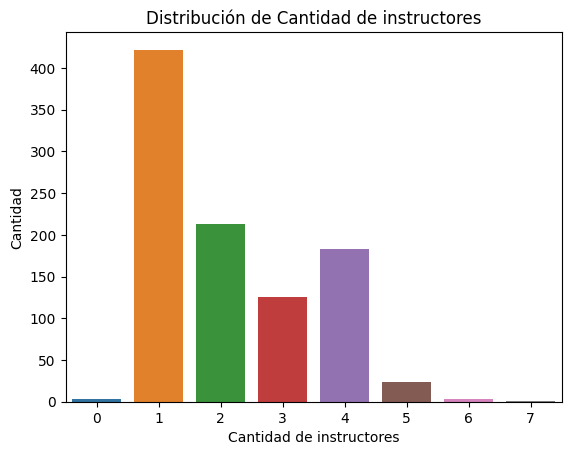

In [62]:
# Graficar el Countplot
sns.countplot(data=edx_courses, x='instructors_count')

# Añadir etiquetas y título
plt.xlabel('Cantidad de instructores')
plt.ylabel('Cantidad')
plt.title('Distribución de Cantidad de instructores')

# Mostrar el gráfico
plt.show()

Podemos visualizar que en la mayoria de los cursos solo hay un instructor.

Vamos a analizar la columna "Level" con un grafico pie.

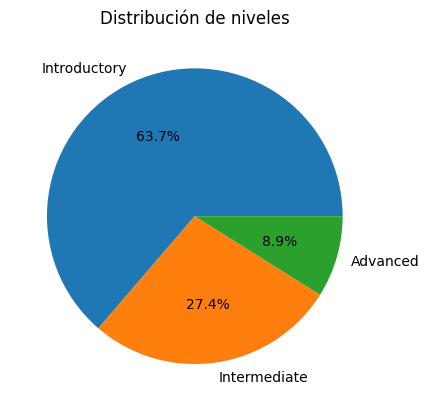

In [63]:
# Obtener los conteos de cada categoría en la columna 'level'
counts = edx_courses['Level'].value_counts()

# Obtener las etiquetas y los valores para el gráfico de torta
labels = counts.index
values = counts.values

# Crear el gráfico de torta
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Agregar título al gráfico
plt.title('Distribución de niveles')

# Mostrar el gráfico
plt.show()

Podemos ver que la mayoria de los cursos son introductorios.

Vamos a analizar la columna "subject" para ver cuantos cursos tiene cada tipo de la columna "subject".

In [64]:
# Ver cuantos cursos tiene cada tipo de la columna "subject"
conteo_categorias = edx_courses['subject'].value_counts()
conteo_categorias

subject
Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Food & Nutrition                  6
Philosophy & Ethics               6
Chemistry                         5
Architecture        

Podemos ver que en la columna "subject" hay mas cursos de "Computer Science".

Vamos a analisar la columna "language". Primero vamos a ver los distintos valores que tiene la columna y luego haremos un grafico countplot.

In [65]:
# Ver cuantos idiomas hay en la columna "language"
conteo_categorias = edx_courses['language'].value_counts()
conteo_categorias

language
English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: count, dtype: int64

Vamos a eliminar los registros que tengan los idiomas "Français", "Italiano", "中文", "Português", "日本語", "اللغة العربية" y "Deutsch" ya que son idiomas que no son relevantes.

In [66]:
languages_to_remove = ["Français", "Italiano", "中文", "Português", "日本語", "اللغة العربية", "Deutsch"]
edx_courses = edx_courses[~edx_courses['language'].isin(languages_to_remove)]

Vamos a realizar un grafico pie para la columna "language".

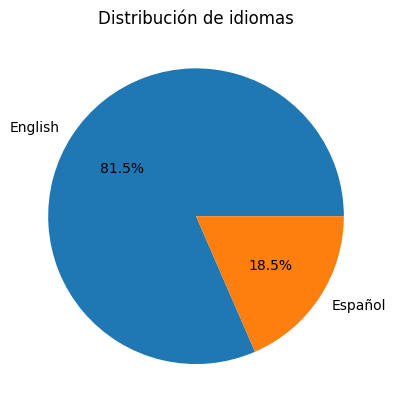

In [67]:
# Obtener los conteos de cada categoría en la columna 'language'
counts = edx_courses['language'].value_counts()

# Obtener las etiquetas y los valores para el gráfico de torta
labels = counts.index
values = counts.values

# Crear el gráfico de torta
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Agregar título al gráfico
plt.title('Distribución de idiomas')

# Mostrar el gráfico
plt.show()

Podemos ver que la mayoria de los cursos son en ingles.

Vamos a visualizar los distintos valores de la columna "subtitles".

In [68]:
# Ver cuantos idiomas hay en la columna "subtitles"
conteo_categorias = edx_courses['subtitles'].value_counts()
conteo_categorias

subtitles
English                                                                            712
Español                                                                            157
English, Español                                                                    21
English, 中文                                                                         19
English, हिन्दी                                                                     10
English, Русский                                                                     5
English, 日本語                                                                         3
English, 中文, 中文                                                                      3
English, Français                                                                    2
اللغة العربية, English, עברית                                                        2
English, Português, Русский                                                          1
English, Español, Português      

Vamos a visualizar los distintos valores de la columna "course_effort".

In [69]:
# Ver distintos valores que hay en la columna "course_effort"
conteo_categorias = edx_courses['course_effort'].value_counts()
conteo_categorias

course_effort
2–4 hours per week      108
2–3 hours per week      101
3–5 hours per week       95
3–4 hours per week       87
4–6 hours per week       79
8–10 hours per week      57
4–5 hours per week       55
1–2 hours per week       54
6–8 hours per week       51
5–7 hours per week       28
5–10 hours per week      23
3–6 hours per week       22
1–3 hours per week       21
2–5 hours per week       18
5–8 hours per week       18
5–6 hours per week       15
8–12 hours per week      13
9–10 hours per week      12
1–5 hours per week       10
4–8 hours per week        8
10–12 hours per week      8
7–10 hours per week       7
4–10 hours per week       7
10–20 hours per week      6
2–6 hours per week        5
6–10 hours per week       5
3–7 hours per week        4
10–11 hours per week      3
10–14 hours per week      3
10–15 hours per week      3
6–12 hours per week       2
1–10 hours per week       2
10–18 hours per week      2
11–13 hours per week      2
6–9 hours per week        2
4–7 ho

Vamos a crear una nueva columna "course_hour_per_week" con el valor medio de las horas por semana en la columna "course_effort".

Creamos una funcion para obtener el valor medio.

In [70]:
import re

# Definir la función para obtener el valor medio
def get_average_effort(effort):
    # Utilizar expresiones regulares para extraer los valores numéricos
    values = re.findall(r'\d+', effort)
    if len(values) >= 2:
        # Calcular el valor medio
        average = (float(values[0]) + float(values[1])) / 2
        return average
    elif len(values) == 1:
        return float(values[0])
    else:
        return None

La función get_average_effort() utiliza la biblioteca re para buscar los valores numéricos en la cadena de esfuerzo. La expresión regular r'\d+' busca uno o más dígitos en la cadena.
Si se encuentran al menos dos valores numéricos, se calcula el promedio y se devuelve como el valor medio. Si solo se encuentra un valor numérico, se devuelve como está. Si no se encuentran valores numéricos, se devuelve None.

In [71]:
# Crear una nueva columna con los valores medios
edx_courses['hours_per_week'] = edx_courses['course_effort'].apply(get_average_effort)

Vamos a analizar la columna "hours_per_week". Vamos a hacer un analisis descriptivo y un histograma.

In [72]:
edx_courses["hours_per_week"].describe()

count    953.000000
mean       4.929171
std        2.804833
min        1.500000
25%        3.000000
50%        4.000000
75%        6.000000
max       24.000000
Name: hours_per_week, dtype: float64

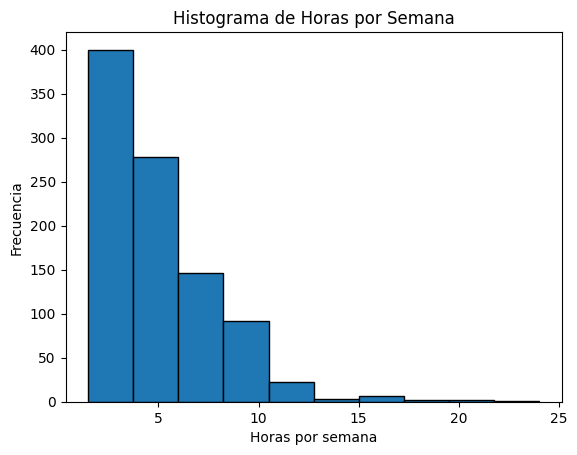

In [73]:
# Crear un histograma
plt.hist(edx_courses['hours_per_week'], bins=10, edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Horas por semana')
plt.ylabel('Frecuencia')
plt.title('Histograma de Horas por Semana')

# Mostrar el histograma
plt.show()

Podemos ver que la mayoria de los cursos demandan pocas horas por semana.

Vamos a analizar la columna "course_length". Vamos a ver los distintos valores de la columna.

In [74]:
# Ver cuantos idiomas hay en la columna "course_length"
conteo_categorias = edx_courses['course_length'].value_counts()
conteo_categorias

course_length
4 Weeks     193
6 Weeks     186
5 Weeks     146
7 Weeks      91
8 Weeks      83
10 Weeks     75
3 Weeks      35
12 Weeks     30
2 Weeks      20
9 Weeks      20
15 Weeks     18
14 Weeks     17
16 Weeks     14
1 Weeks       8
11 Weeks      7
13 Weeks      5
18 Weeks      4
17 Weeks      1
Name: count, dtype: int64

Podemos ver que la mayoria de los cursos tienen una duracion que ronda entre 4 a 6 semanas.

Vamos a analizar la columna "price". Vamos a ver los distintos valores de esta columna.

In [75]:
# Ver cuantos idiomas hay en la columna "price"
conteo_categorias = edx_courses['price'].value_counts()
conteo_categorias

price
FREE-Add a Verified Certificate for $49 USD        262
FREE-Add a Verified Certificate for $99 USD        135
FREE-Add a Verified Certificate for $50 USD         95
FREE-Add a Verified Certificate for $199 USD        85
FREE-Add a Verified Certificate for $149 USD        76
FREE-Add a Verified Certificate for $25 USD         46
FREE-Add a Verified Certificate for $139 USD        30
FREE-Add a Verified Certificate for $150 USD        27
FREE-Add a Verified Certificate for $249 USD        26
FREE-Add a Verified Certificate for $79 USD         21
FREE-Add a Verified Certificate for $169 USD        19
FREE-Add a Verified Certificate for $29 USD         15
FREE-Add a Verified Certificate for $39 USD         13
FREE-Add a Verified Certificate for $299 USD         9
FREE-Add a Verified Certificate for $129 USD         9
FREE-Add a Verified Certificate for $125 USD         8
FREE-Add a Verified Certificate for $5 USD           7
FREE-Add a Verified Certificate for $59 USD          7
FREE

Podemos ver que en la mayoria de los cursos el certificado cuesta $49 USD.

Vamos a crear una columna "price_certificate_USD" con los precios de los certificados de la columna "price".

In [76]:
import re

# Crear una nueva columna 'price_certificate_USD' y extraer el número de la columna 'price'
edx_courses['price_certificate_USD'] = edx_courses['price'].str.extract(r'(\d+)').astype("Int64") # str.extract() de Pandas junto con una expresión regular r'(\d+)' para buscar una secuencia de dígitos en la cadena de la columna 'price'.

Vamos a realizar un histograma para analizar la columna "price_certificate_USD".

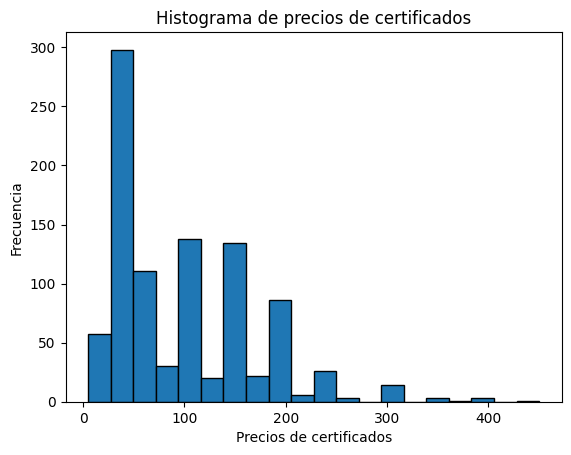

In [77]:
# Crear un histograma
plt.hist(edx_courses['price_certificate_USD'], bins=20, edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Precios de certificados')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios de certificados')

# Mostrar el histograma
plt.show()

Vamos a analizar la columna "course_description". Vamos a hacer una nube de palabras frecuentes en la descripcion de los cursos.

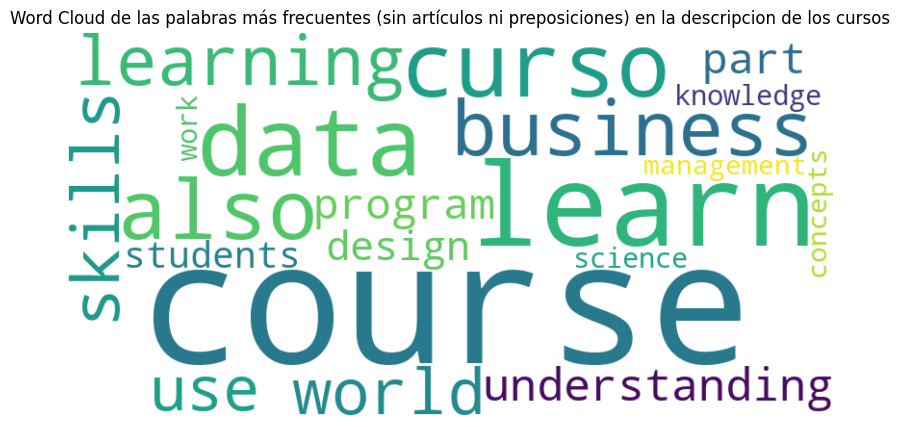

In [78]:
# Descargar las stop words en inglés y en español
stop_words_english = set(stopwords.words('english'))
stop_words_spanish = set(stopwords.words('spanish'))

# Obtener la columna 'title' como una lista
course_names = edx_courses['course_description'].tolist()
course_names = edx_courses['course_description'].tolist()

# Obtener la columna 'course_description' como una lista
course_names = edx_courses['course_description'].tolist()

# Filtrar los valores no numéricos y convertirlos a cadenas de texto
course_names = [str(course) for course in course_names if not pd.isnull(course)]

# Unir los nombres de los cursos en un solo texto
text = ' '.join(course_names)

# Tokenización y eliminación de palabras comunes (stop words)
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalpha()
         and word.lower() not in stop_words_english
         and word.lower() not in stop_words_spanish]

# Contar la frecuencia de las palabras
word_counts = Counter(words)

# Obtener las palabras más frecuentes
top_words = word_counts.most_common(20)  # Cambia el número 20 según la cantidad de palabras más frecuentes que desees incluir

# Crear el objeto WordCloud con las palabras más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de las palabras más frecuentes (sin artículos ni preposiciones) en la descripcion de los cursos')
plt.show()

Podemos visualizar que las palabras mas frecuentes estan referidas a "curso".

Vamos a analizar la columna "course_syllabus".

In [79]:
null_count = edx_courses['course_syllabus'].isnull().sum()
null_count

550

Como podemos ver tiene 550 valores nulos la columna "course_syllabus", por lo tanto decidi eliminar la columna.

In [80]:
edx_courses.drop('course_syllabus', axis=1, inplace=True)

## Analisis de Cursos de Udemy

Vamos a usar el dataset "udemy_courses_rate" para analizar los cursos de Udemy. Este dataset tiene dos columnas adicionales al dataset proporcionado por Henry, la columna "rate" con el puntaje de cada curso y la columna "cantidad_comentarios". La informacion de estas columnas se extrajo del dataset "udemy_reviews" pero no posee informacion de todos los cursos.

In [81]:
udemy_courses_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course_id             3678 non-null   object 
 1   course_title          3678 non-null   object 
 2   url                   3678 non-null   object 
 3   is_paid               3678 non-null   bool   
 4   price                 3678 non-null   int64  
 5   num_subscribers       3678 non-null   int64  
 6   num_reviews           3678 non-null   int64  
 7   num_lectures          3678 non-null   int64  
 8   level                 3678 non-null   object 
 9   content_duration      3678 non-null   float64
 10  published_timestamp   3678 non-null   object 
 11  subject               3678 non-null   object 
 12  rate                  2328 non-null   Int64  
 13  cantidad_comentarios  2328 non-null   Int64  
dtypes: Int64(2), bool(1), float64(1), int64(4), object(6)
memory usage: 384.

In [82]:
udemy_courses_rate.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,rate,cantidad_comentarios
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,4,30
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,4,402
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,4,149
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,4,92
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,5,20


Vamos a analizar la columna "course_title" con una nube de palabras frecuentes en los titulos de los cursos de Udemy.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Outlet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


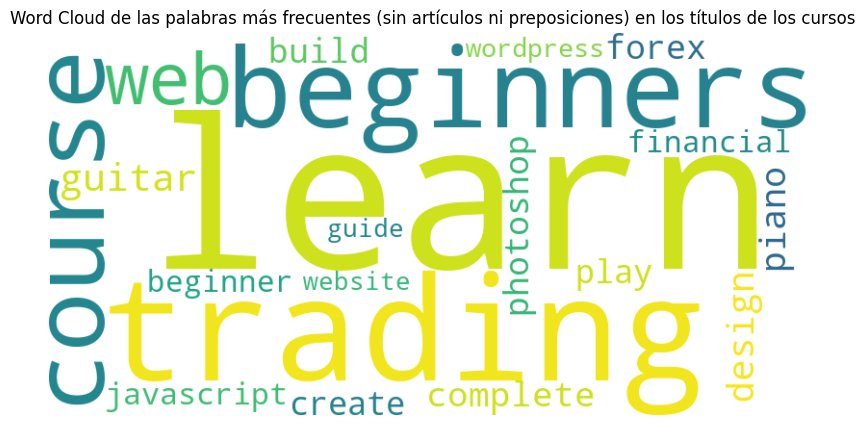

In [83]:
# Obtener la columna 'name' como una lista
course_names = udemy_courses_rate['course_title'].tolist()

# Unir los nombres de los cursos en un solo texto
text = ' '.join(course_names)

# Tokenización y eliminación de palabras comunes (stop words)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Puedes cambiar 'english' por el idioma correspondiente
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Contar la frecuencia de las palabras
word_counts = Counter(words)

# Obtener las palabras más frecuentes
top_words = word_counts.most_common(20)  # Cambia el número 20 según la cantidad de palabras más frecuentes que desees incluir

# Crear el objeto WordCloud con las palabras más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de las palabras más frecuentes (sin artículos ni preposiciones) en los títulos de los cursos')
plt.show()

Podemos ver que la palabra mas frecuente en los titulos de los cursos es "learn".

Vamos a hacer un grafico de pie para analizar la columna "is_paid".

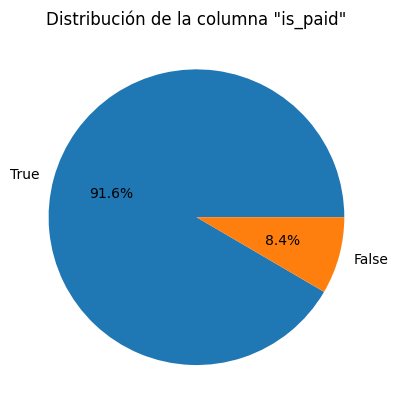

In [84]:
# Obtener los conteos de cada categoría en la columna 'level'
counts = udemy_courses_rate['is_paid'].value_counts()

# Obtener las etiquetas y los valores para el gráfico de torta
labels = counts.index
values = counts.values

# Crear el gráfico de torta
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Agregar título al gráfico
plt.title('Distribución de la columna "is_paid"')

# Mostrar el gráfico
plt.show()

Podemos observar que la mayoria de los cursos de Udemy son pagos.

Vamos a hacer un analisis descriptivo de la columna "price" y un histrograma.

In [85]:
udemy_courses_rate["price"].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

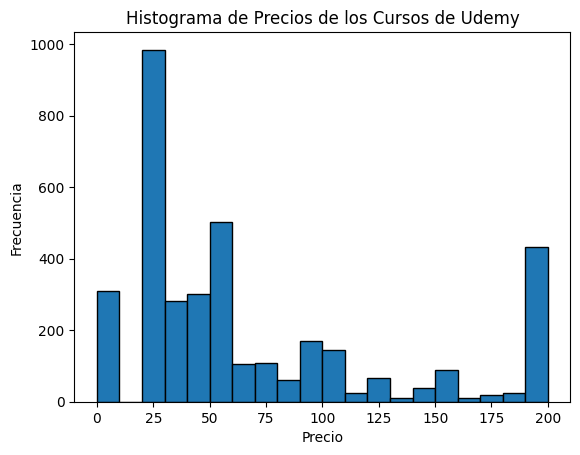

In [86]:
# Crear el histograma
plt.hist(udemy_courses_rate["price"], bins=20, edgecolor='black') 

# Agregar etiquetas y título
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios de los Cursos de Udemy')

# Mostrar el histograma
plt.show()

Podemos ver que la mayoria de los cursos en Udemy cuestan $25 USD.

Vamos a ver los 10 cursos mas caros y los 10 cursos mas baratos de Udemy.

In [87]:
# Ordenar el DataFrame en función de los valores de 'price' en orden descendente (cursos más caros)
cursos_mas_caros = udemy_courses_rate.sort_values('price', ascending=False)

# Imprimir los cursos más caros
print("Cursos más caros:")
print(cursos_mas_caros[['course_title', 'price']].head(10))

# Ordenar el DataFrame en función de los valores de 'price' en orden ascendente (cursos más baratos)
cursos_mas_baratos = udemy_courses_rate.sort_values('price', ascending=True)

# Imprimir los cursos más baratos
print("Cursos más baratos:")
print(cursos_mas_baratos[['course_title', 'price']].head(10))

Cursos más caros:
                                           course_title  price
0                    Ultimate Investment Banking Course    200
2983  Complete Guide to Front-End Web Development an...    200
3004  Code & Grow Rich:  Earn More As An Entrepreneu...    200
648   Contango VXX - ETF Options Trading - Double Yo...    200
3016                              Javascript Specialist    200
638         Bitcoin & Ethereum Course (2 Course Bundle)    200
3020  Laravel, the complete guide with real world pr...    200
3021  VueJS V1 Introduction to VueJS JavaScript Fram...    200
634   Win 90% of Trades; Quantitative Investments Mo...    200
630   Professional Trading With Institutional Supply...    200
Cursos más baratos:
                                           course_title  price
1369   Create Stunning Infographics to Share your Ideas      0
433       IAS 12 - Accounting for Income Taxes (Basics)      0
432      Forex Trading For Beginners: Technical Trading      0
966   The Tax Adv

Vamos a hacer un analisis descriptivo de la columna "num_subscribers" y un histrograma.

In [88]:
udemy_courses_rate["num_subscribers"].describe()

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

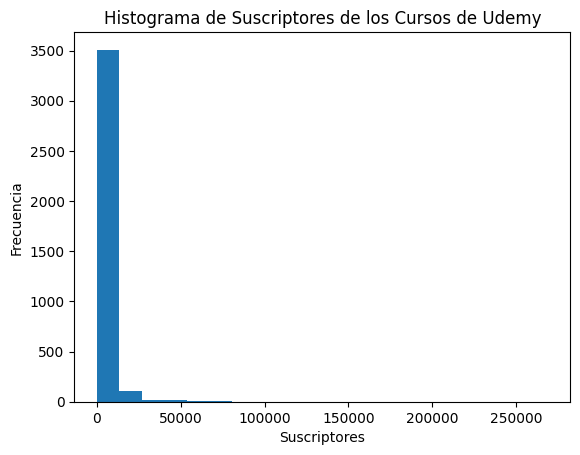

In [89]:
# Crear el histograma
plt.hist(udemy_courses_rate["num_subscribers"], bins=20)

# Agregar etiquetas y título
plt.xlabel('Suscriptores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Suscriptores de los Cursos de Udemy')

# Mostrar el histograma
plt.show()

Podemos ver que la mayoria de los cursos tienen pocos suscriptores.

Vamos a ver los cursos que mas suscriptores tienen.

In [90]:
# Ordenar el DataFrame en función de los valores de 'num_subscribers' en orden descendente
df_sorted = udemy_courses_rate.sort_values('num_subscribers', ascending=False)

# Imprimir los cursos con más suscriptores
print(df_sorted[['course_title', 'num_subscribers']].head(10))

                                           course_title  num_subscribers
2827               Learn HTML5 Programming From Scratch           268923
3032                     Coding for Entrepreneurs Basic           161029
3230                         The Web Developer Bootcamp           121584
2783  Build Your First Website in 1 Week with HTML5 ...           120291
3232              The Complete Web Developer Course 2.0           114512
1896              Free Beginner Electric Guitar Lessons           101154
2589  Web Design for Web Developers: Build Beautiful...            98867
2619             Learn Javascript & JQuery From Scratch            84897
3289  Practical PHP: Master the Basics and Code Dyna...            83737
3247          JavaScript: Understanding the Weird Parts            79612


Vamos a ver los cursos que menos suscriptores tienen.

In [91]:
# Ordenar el DataFrame en función de los valores de 'num_subscribers' en orden ascendente
df_sorted = udemy_courses_rate.sort_values('num_subscribers', ascending=True)

# Imprimir los cursos con menos suscriptores
print(df_sorted[['course_title', 'num_subscribers']].head(10))

                                          course_title  num_subscribers
885                               beginning accounting                0
456  Introduction to Project Management for Finance...                0
457              Best Practices in Corporate Budgeting                0
458                Financial Statement Auditing Cycles                0
459       Case studies on credit appraisal for bankers                0
460                      Building a Balanced Scorecard                0
461  Options Trading Foundation: Your journey to co...                0
462  Forex how traders beat the markest with little...                0
463                  CFA Level 2- Quantitative Methods                0
464                           Foundations of Investing                0


Vamos a analizar la columna "num_reviews" con un analisis descriptivo y un histograma para analizar las revisiones de los cursos de Udemy.

In [92]:
udemy_courses_rate["num_reviews"].describe()

count     3678.000000
mean       156.259108
std        935.452044
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

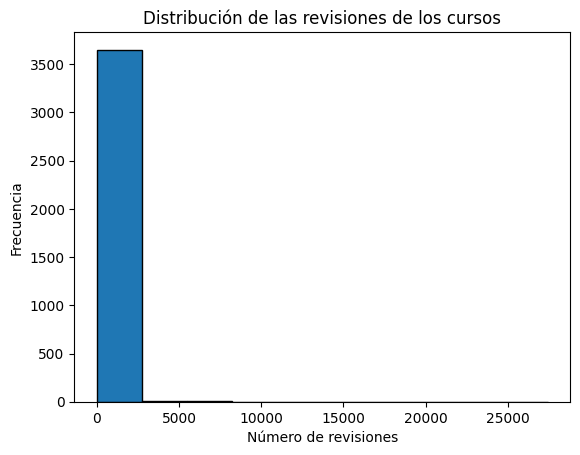

In [93]:
# Histograma de la columna 'num_reviews'
plt.hist(udemy_courses_rate['num_reviews'], bins=10, edgecolor='black')
plt.xlabel('Número de revisiones')
plt.ylabel('Frecuencia')
plt.title('Distribución de las revisiones de los cursos')
plt.show()

Podemos ver que la mayoria de los cursos tienen pocas revisiones.

Vamos a analizar la columna "num_lectures" con un analisis descriptivo y un histograma para analizar las conferencias de los cursos de Udemy.

In [94]:
udemy_courses_rate["num_lectures"].describe()

count    3678.000000
mean       40.108755
std        50.383346
min         0.000000
25%        15.000000
50%        25.000000
75%        45.750000
max       779.000000
Name: num_lectures, dtype: float64

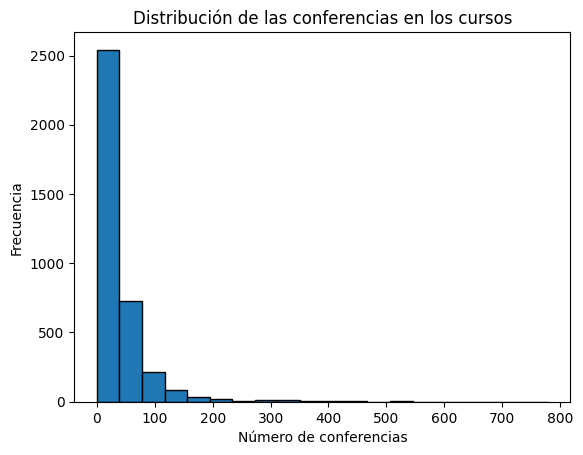

In [95]:
# Histograma de la columna 'num_lectures'
plt.hist(udemy_courses_rate['num_lectures'], bins=20, edgecolor='black')
plt.xlabel('Número de conferencias')
plt.ylabel('Frecuencia')
plt.title('Distribución de las conferencias en los cursos')
plt.show()

Vamos a analizar la columna "level" con un grafico countplot.

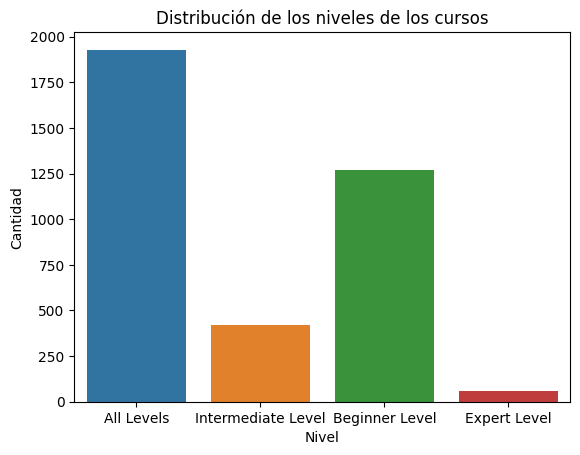

In [96]:
# Grafico de conteo para la columna 'level'
sns.countplot(data=udemy_courses_rate, x='level')
plt.xlabel('Nivel')
plt.ylabel('Cantidad')
plt.title('Distribución de los niveles de los cursos')
plt.show()

Podemos ver que la mayoria de los cursos en Udemy tienen un nivel general.

Vamos a analizar la columna "content_duration" que contiene la duracion de los cursos en horas.

In [97]:
udemy_courses_rate['content_duration'].describe()

count    3678.000000
mean        4.094517
std         6.053840
min         0.000000
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64

Con el analisis descriptivo podemos ver que la mayoria de los cursos demandan pocas horas.

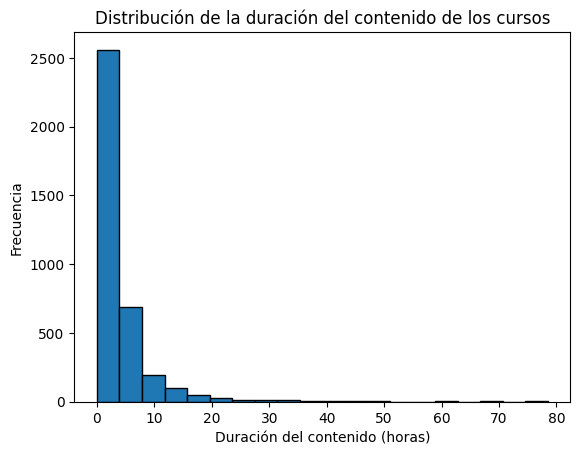

In [98]:
# Histograma de la columna 'content_duration'
plt.hist(udemy_courses_rate['content_duration'], bins=20, edgecolor='black')
plt.xlabel('Duración del contenido (horas)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la duración del contenido de los cursos')
plt.show()

Vamos a analizar la columna "published_timestamp" que contiene datos de tiempo en formato de fecha y hora de los cursos.

Vamos a extraer información temporal de la columna, como el año, el mes o el día de la semana en que se publicaron los cursos. Esto permitirá comprender la distribución temporal de los cursos.

In [99]:
# Convertir la columna 'published_timestamp' al tipo de datos de fecha y hora
udemy_courses_rate['published_timestamp'] = pd.to_datetime(udemy_courses_rate['published_timestamp'])

# Obtener el año de publicación
udemy_courses_rate['year'] = udemy_courses_rate['published_timestamp'].dt.year

# Obtener el mes de publicación
udemy_courses_rate['month'] = udemy_courses_rate['published_timestamp'].dt.month

# Obtener el día de la semana de publicación
udemy_courses_rate['day_of_week'] = udemy_courses_rate['published_timestamp'].dt.day_of_week


Vamos a analizar la distribución de los cursos en función de la fecha de publicación. Vamos a crear un gráficos de barras para mostrar la cantidad de cursos publicados por año.

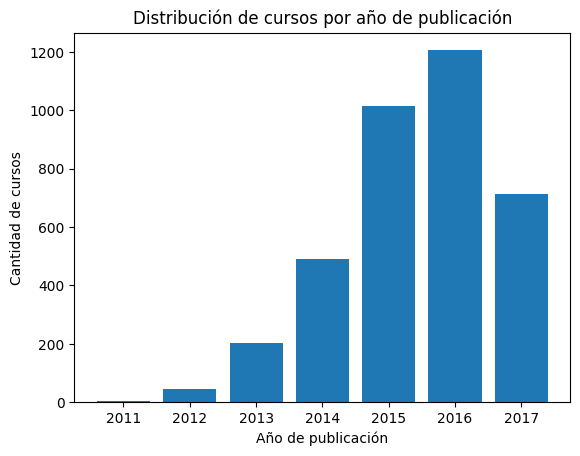

In [100]:
# Gráfico de barras de la cantidad de cursos por año de publicación
course_counts_by_year = udemy_courses_rate['year'].value_counts().sort_index()
plt.bar(course_counts_by_year.index, course_counts_by_year.values)
plt.xlabel('Año de publicación')
plt.ylabel('Cantidad de cursos')
plt.title('Distribución de cursos por año de publicación')
plt.show()


Podemos visualizar que en el año 2016 fue el año que mas cursos se lanzaron.

Vamos a analizar la columna "subject" la cual contiene información sobre el tema de los cursos.

Vamos a ver la frecuencia de los distintos valores de esta columna.

In [101]:
udemy_courses_rate['subject'].value_counts()

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

Vamos a hacer un countplot para analizar esta columna.

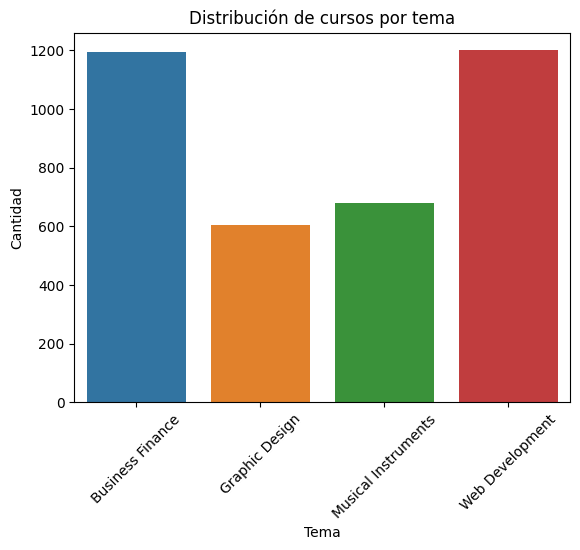

In [102]:
# Countplot para la columna 'subject'
sns.countplot(data=udemy_courses_rate, x='subject')
plt.xlabel('Tema')
plt.ylabel('Cantidad')
plt.title('Distribución de cursos por tema')
plt.xticks(rotation=45)
plt.show()

Con el analisis realizado podemos concluir que los temas mas frecuentes en los cursos de Udemy son "Web Development" y "Business Finance".

Vamos a cambiar a tipo "categoy" la columna "rate" y vamos a hacer un analisis con un countplot.

In [103]:
# Cambiamos a tipo "category" la columna "rate"
udemy_courses_rate['rate'] = udemy_courses_rate['rate'].astype('category')


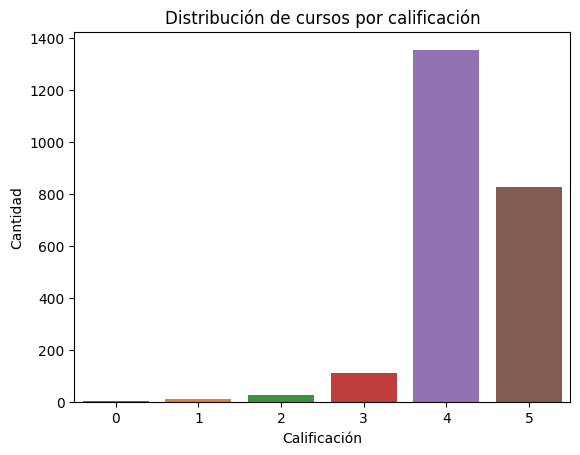

In [104]:
# Countplot para la columna 'rate'
sns.countplot(data=udemy_courses_rate, x='rate')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.title('Distribución de cursos por calificación')
plt.show()

Podemos ver que la mayoria de los cursos en Udemy tienen una calificacion de 4.

Vamos a analizar la columa "cantidad_comentarios". Primero vamos a cambiar los valores nulos por 0. Luego vamos a hacer un analisis descriptivo y un histograma.

In [105]:
udemy_courses_rate['cantidad_comentarios'] = udemy_courses_rate['cantidad_comentarios'].fillna(0)

In [106]:
udemy_courses_rate["cantidad_comentarios"].describe()

count         3678.0
mean      167.558999
std      1096.217613
min              0.0
25%              0.0
50%             10.0
75%             54.0
max          31001.0
Name: cantidad_comentarios, dtype: Float64

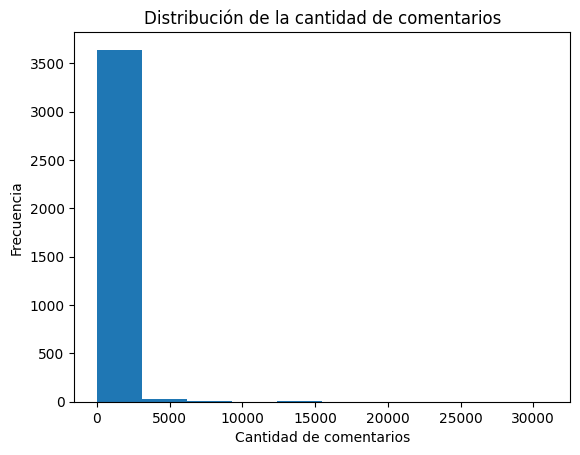

In [107]:
# Histograma
plt.hist(udemy_courses_rate["cantidad_comentarios"], bins=10)
plt.xlabel('Cantidad de comentarios')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de comentarios')
plt.show()

Como la columna "cantidad_comentarios
" tenia muchos valores nulos, se ven muchos registros sin comentarios.

In [108]:
udemy_courses_rate.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,rate,cantidad_comentarios,year,month,day_of_week
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,4,30,2017,1,2


# Analisis Multivariable

El análisis multivariable es una técnica estadística que se utiliza para examinar la relación entre múltiples variables en un conjunto de datos. A diferencia del análisis univariable que se centra en una variable a la vez, el análisis multivariable permite explorar cómo las variables se relacionan entre sí y cómo afectan a los resultados o patrones observados.

Vamos a hacer un analisis multivariable a los cursos de las diferentes plataformas.

## Cursos de Coursera. Analisis multivariable.

Vamos a comenzar calculando la matriz de correlación para medir la relación lineal entre pares de variables numéricas.

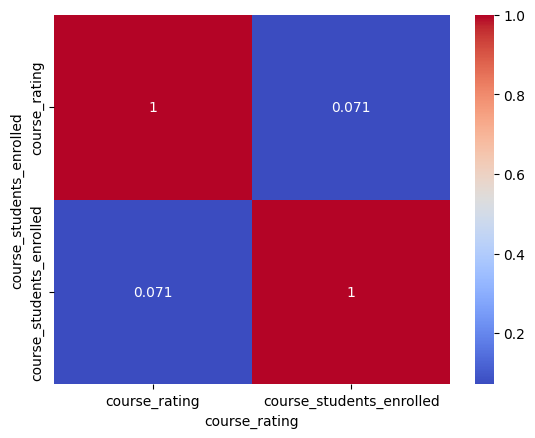

In [109]:
# Crear un DataFrame con las columnas seleccionadas
df = coursera_courses_2[["course_rating", "course_students_enrolled"]]

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Añadir títulos a los ejes x e y
plt.xlabel("course_rating")
plt.ylabel("course_students_enrolled")

# Mostrar el mapa de calor
plt.show()

El mapa de calor nos indica que tienen una correlacion muy baja ya que el valor de correlacion es cercano a 0.

Los valores de correlación pueden variar entre -1 y 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica falta de correlación.

Vamos a crear un boxplot para comparar la distribución de "course_students_enrolled" en diferentes niveles de dificultad ("course_difficulty").

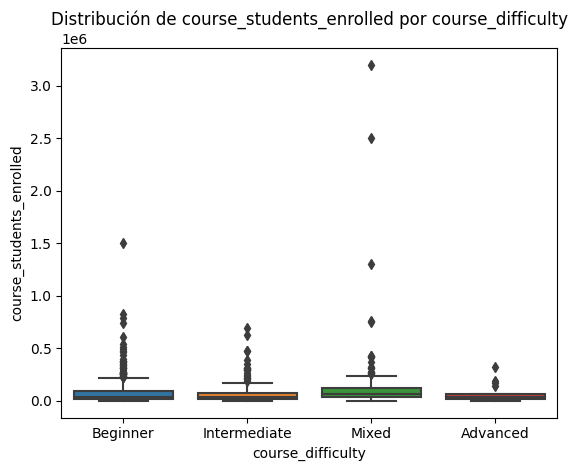

In [110]:
# Boxplot de "course_students_enrolled" por "course_difficulty"
sns.boxplot(x="course_difficulty", y="course_students_enrolled", data=coursera_courses_2)
plt.xlabel("course_difficulty")
plt.ylabel("course_students_enrolled")
plt.title("Distribución de course_students_enrolled por course_difficulty")
plt.show()

Podemos ver que en la variable "course_difficulty" en la categoria "Mixed" es donde el promedio de matriculados es mayor.

Vamos a crear un boxplot para comparar la distribución de "course_students_enrolled" por "course_Certificate_type".

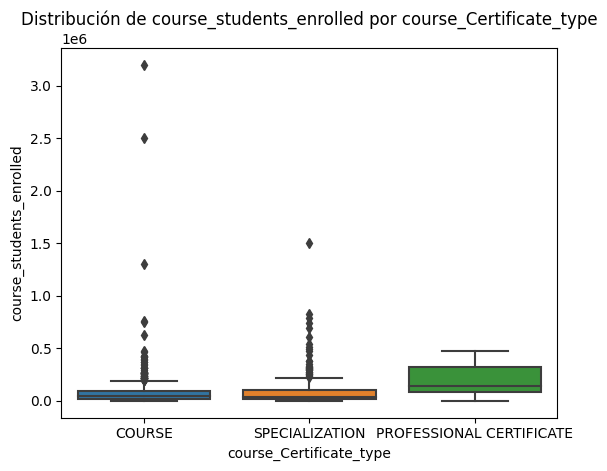

In [111]:
# Boxplot de "course_students_enrolled" por "course_Certificate_type"
sns.boxplot(x="course_Certificate_type", y="course_students_enrolled", data=coursera_courses_2)
plt.xlabel("course_Certificate_type")
plt.ylabel("course_students_enrolled")
plt.title("Distribución de course_students_enrolled por course_Certificate_type")
plt.show()

Podemos visualizar que en los tipos de cursos la categoria "PROFESSIONAL CERTIFICATE" es donde el promedio de matriculados es mayor.

Vamos a crear un boxplot para comparar la distribución de "course_rating" por "course_difficulty"

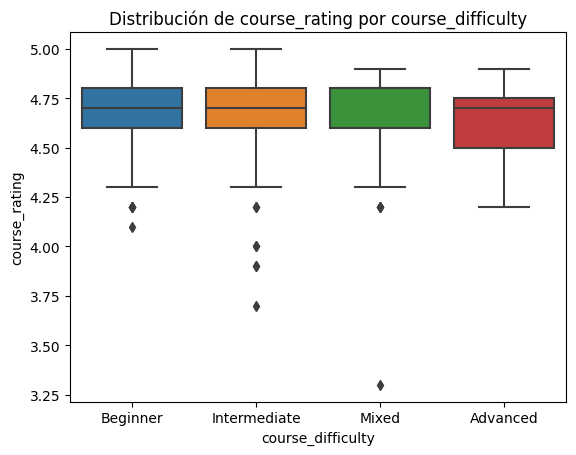

In [112]:
# Boxplot de "course_rating" por "course_difficulty"
sns.boxplot(x="course_difficulty", y="course_rating", data=coursera_courses_2)
plt.xlabel("course_difficulty")
plt.ylabel("course_rating")
plt.title("Distribución de course_rating por course_difficulty")
plt.show()

Podemos ver que no hay mucha variacion de puntuacion por cada categoria de dificultad pero en las categorias "Beginner" e "Intermediate" el promedio de las puntuaciones es mayor.

Vamos a crear un boxplot para comparar la distribución de "course_rating" por "course_Certificate_type".

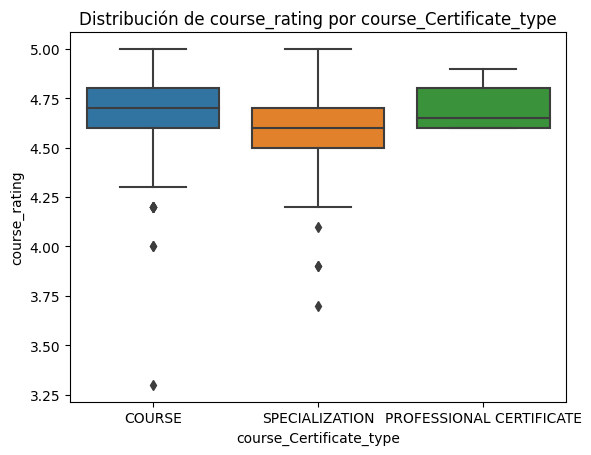

In [113]:
# Boxplot de "course_rating" por "course_Certificate_type"
sns.boxplot(x="course_Certificate_type", y="course_rating", data=coursera_courses_2)
plt.xlabel("course_Certificate_type")
plt.ylabel("course_rating")
plt.title("Distribución de course_rating por course_Certificate_type")
plt.show()

Podemos ver que no hay mucha variacion de puntuacion por cada categoria de tipo de certificado pero en la categoria "COURSE" el promedio de las puntuaciones es mayor.

Vamos a crear tablas de contingencia para analizar la relación entre "course_organization" y "course_Certificate_type". Esto mostrará la frecuencia de combinaciones específicas de categorías en ambas variables. 

In [114]:
# Crear una tabla de contingencia entre "course_organization" y "course_Certificate_type"
contingency_table = pd.crosstab(coursera_courses_2["course_organization"], coursera_courses_2["course_Certificate_type"])
contingency_table

course_Certificate_type,COURSE,PROFESSIONAL CERTIFICATE,SPECIALIZATION
course_organization,,,
(ISC)²,2,0,1
Amazon Web Services,5,0,1
American Institute of Business and Economics,0,0,1
American Museum of Natural History,2,0,0
Arizona State University,2,1,4
...,...,...,...
Yonsei University,2,0,2
deeplearning.ai,12,0,4
École Polytechnique,1,0,0


## Cursos de Edx. Analisis multivariable.

Vamos a calcular la matriz de correlación para examinar las relaciones lineales entre las variables numéricas. Esto te ayudará a identificar qué variables están más correlacionadas entre sí.

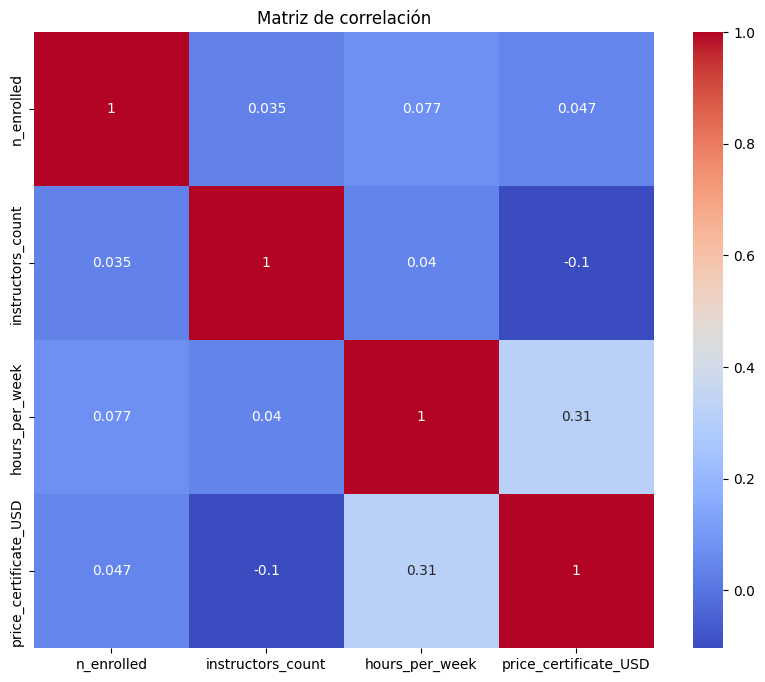

In [115]:
# Seleccionar las variables numéricas para el análisis de correlación
numeric_variables = ["n_enrolled", "instructors_count", "hours_per_week", "price_certificate_USD"]

# Calcular la matriz de correlación
correlation_matrix = edx_courses[numeric_variables].corr()

# Generar un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

Podemos ver que hay una correlacion muy baja entre las variables numericas.

Vamos a crear un boxplot para comparar la distribución de "price_certificate_USD" por "course_type".

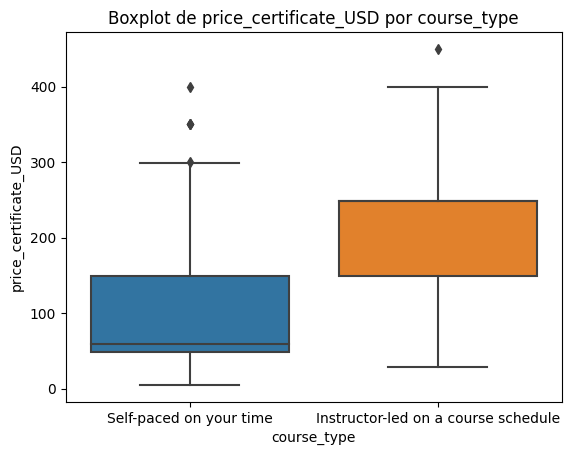

In [116]:
sns.boxplot(x="course_type", y="price_certificate_USD", data=edx_courses)
plt.xlabel("course_type")
plt.ylabel("price_certificate_USD")
plt.title("Boxplot de price_certificate_USD por course_type")
plt.show()

Podemos visualizar que el precio promedio de los cursos es mas caro en la categoria "Instructor-led on a course schedule".

Vamos a crear un boxplot para comparar la distribución de "price_certificate_USD" por "Level".

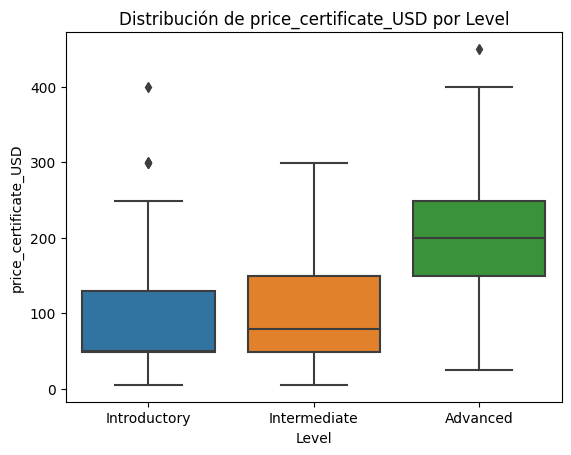

In [117]:
sns.boxplot(x="Level", y="price_certificate_USD", data=edx_courses)
plt.xlabel("Level")
plt.ylabel("price_certificate_USD")
plt.title("Distribución de price_certificate_USD por Level")
plt.show()

Podemos visualizar que el precio promedio de los cursos es mas caro en los cursos avanzados.

Vamos a crear un boxplot para comparar la distribución de "price_certificate_USD" por "language".

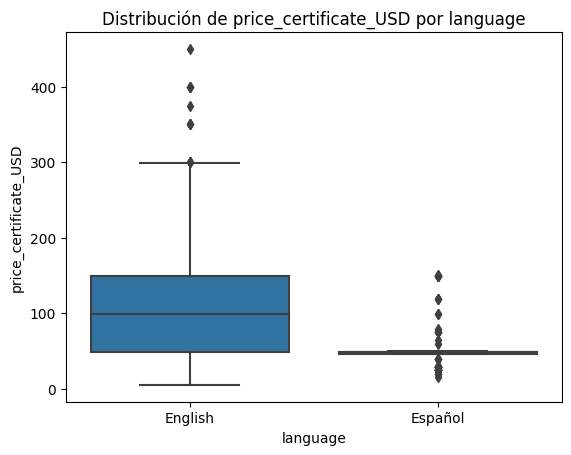

In [118]:
sns.boxplot(x="language", y="price_certificate_USD", data=edx_courses)
plt.xlabel("language")
plt.ylabel("price_certificate_USD")
plt.title("Distribución de price_certificate_USD por language")
plt.show()

Podemos visualizar que el precio promedio de los cursos es mas caro en los cursos en Ingles.

## Cursos de Udemy. Analisis multivariable.

Vamos a comenzar calculando la matriz de correlación para medir la relación lineal entre pares de variables numéricas.

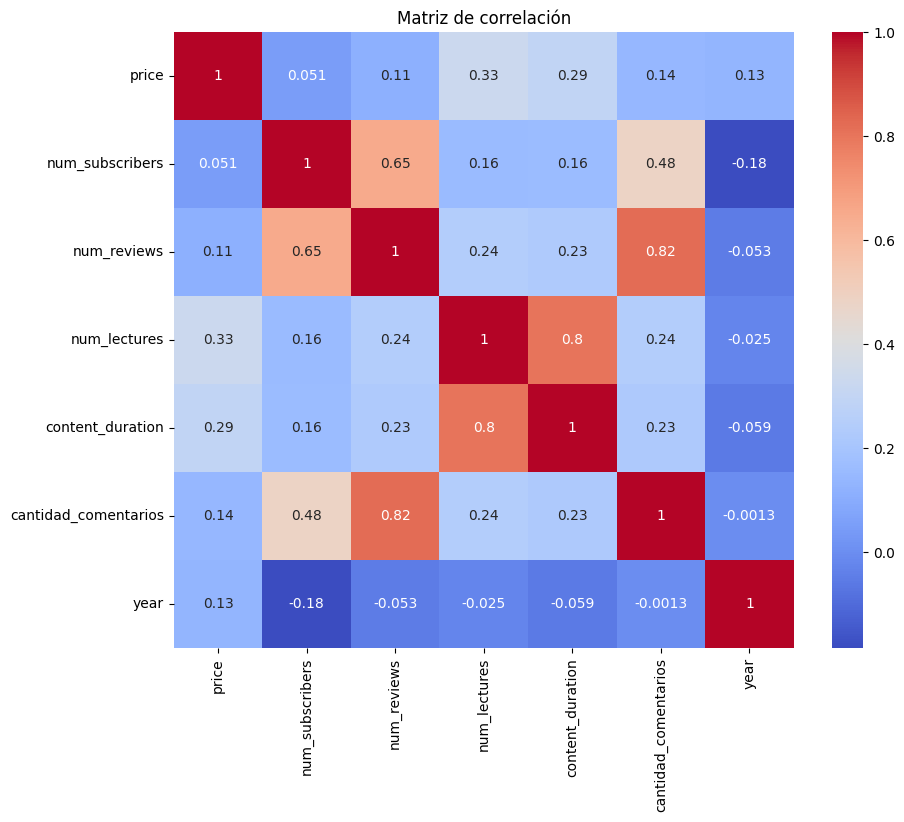

In [119]:
# Seleccionar las variables numéricas para el análisis de correlación
numeric_variables = ["price", "num_subscribers", "num_reviews", "num_lectures", "content_duration", "cantidad_comentarios", "year"]

# Calcular la matriz de correlación
correlation_matrix = udemy_courses_rate[numeric_variables].corr()

# Generar un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

Podemos ver que hay una correlacion alta entre las variables "num_reviews" con "cantidad_comentarios" y tambien en "num_lectures" con "content_duration". Tambien hay una correlacion razonable entre las variables "num_subscribers" con "num_reviews".

Vamos a crear un scatterlot entre "price" con "num_lectures".

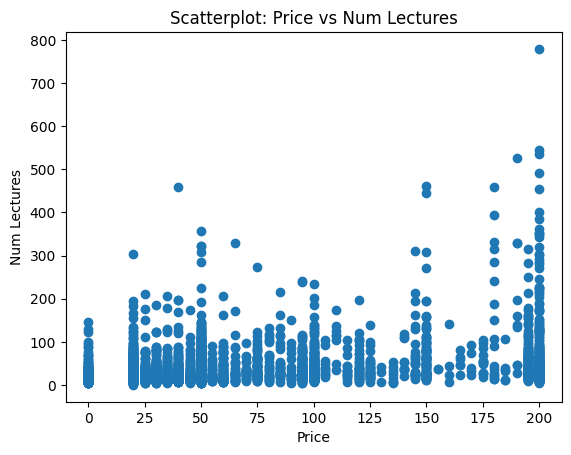

In [120]:
# Crear el scatterplot
plt.scatter(udemy_courses_rate["price"], udemy_courses_rate["num_lectures"])
plt.xlabel("Price")
plt.ylabel("Num Lectures")
plt.title("Scatterplot: Price vs Num Lectures")
plt.show()


Vamos a crear un boxplot para comparar la distribución entre "price" con "level"

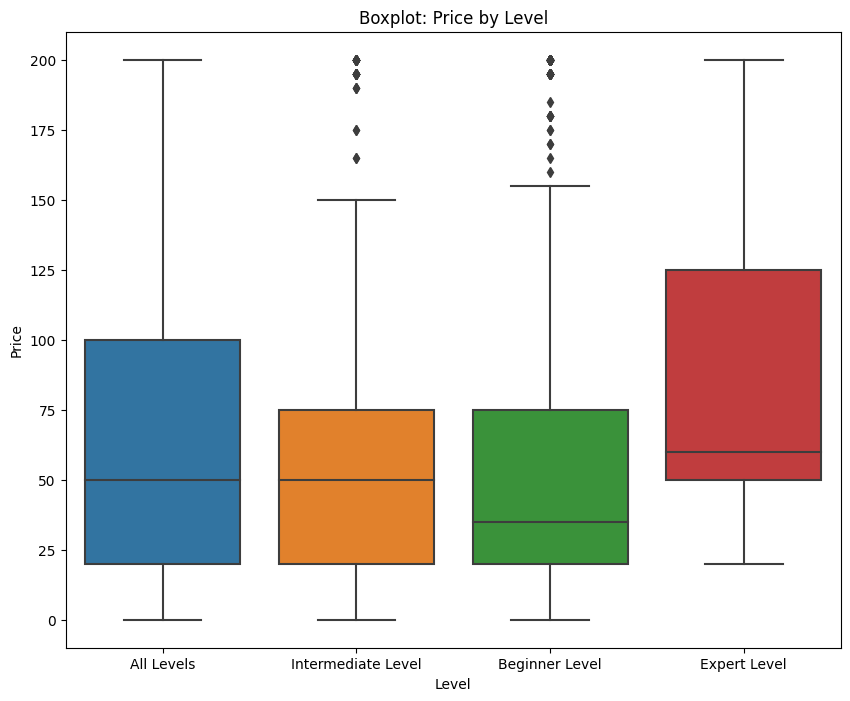

In [121]:
# Crear el boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x="level", y="price", data=udemy_courses_rate)
plt.xlabel("Level")
plt.ylabel("Price")
plt.title("Boxplot: Price by Level")
plt.show()

Podemos visualizar que no hay mucha variacion en el promedio del precio de los cursos con respecto al nivel. Tambien podemos ver que los cursos de nivel "Beginner Level" tienen el precio promedio mas bajo y que los cursos de nivel "Expert Level" tienen el precio promedio mas alto.

Vamos a crear un boxplot para comparar la distribución entre "price" con "rate"

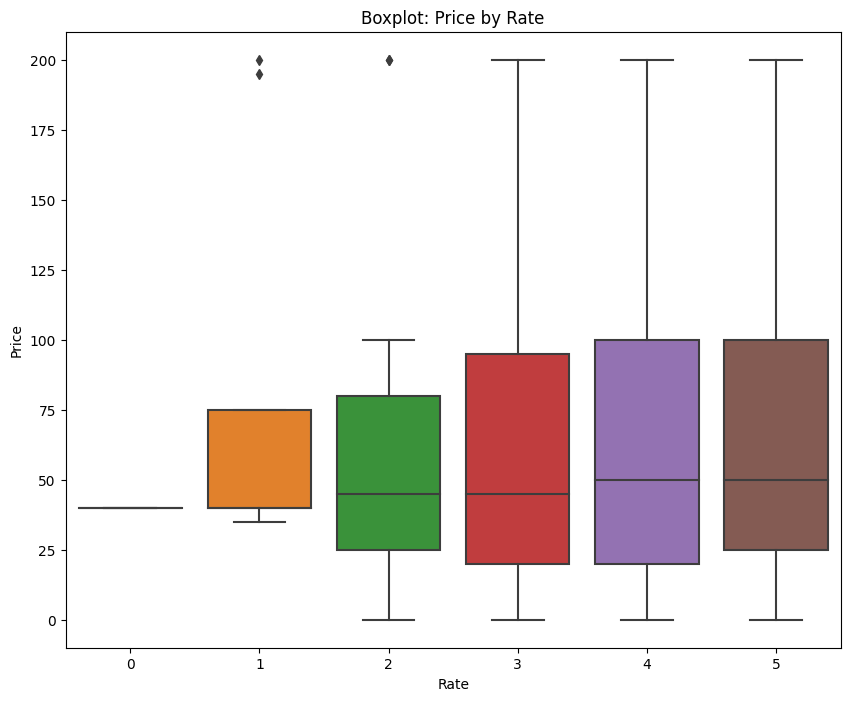

In [122]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="rate", y="price", data=udemy_courses_rate)
plt.xlabel("Rate")
plt.ylabel("Price")
plt.title("Boxplot: Price by Rate")
plt.show()

Podemos ver que no hay mucha variacion entre los precios de los cursos con respecto a su puntuacion.

Vamos a crear un boxplot para comparar la distribución entre "price" con "year"

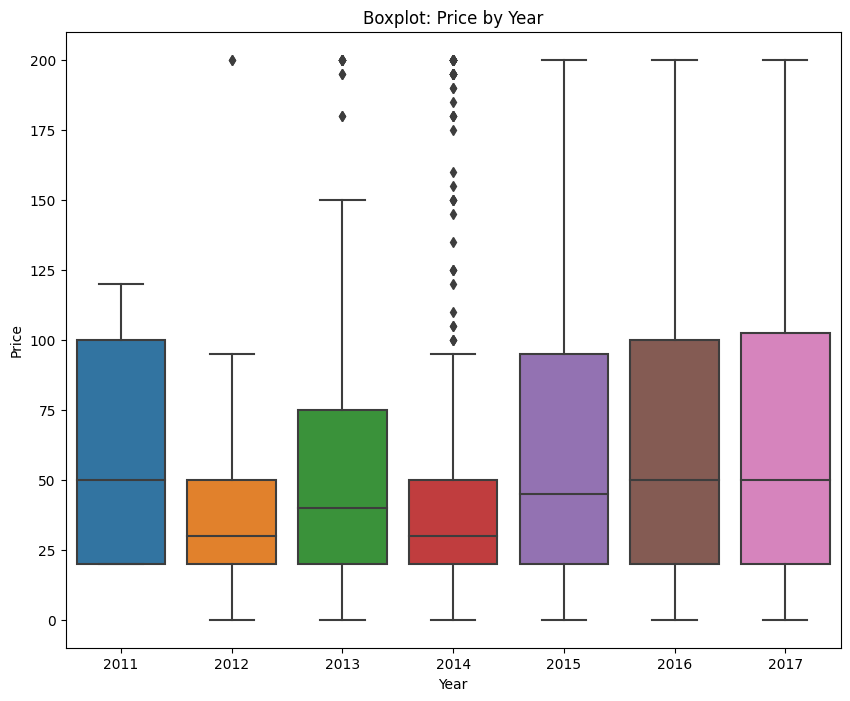

In [123]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="year", y="price", data=udemy_courses_rate)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Boxplot: Price by Year")
plt.show()

In [124]:
coursera_courses_2.to_csv('coursera_courses_final.csv', index=False)

In [125]:
edx_courses.to_csv('edx_courses_final.csv', index=False)

In [126]:
udemy_courses_rate.to_csv('udemy_courses_final.csv', index=False)

In [128]:
udemy_courses_rate["num_subscribers"].mean()

3197.150625339859